# Plotting maps with ocean bench

In [1]:
from pathlib import Path
if Path('.').absolute().name == 'notebooks':
    %cd ..

/raid/localscratch/qfebvre/oceanbench


In [2]:
import yaml
import inspect
from IPython.display import Markdown, display
from omegaconf import OmegaConf
import hvplot
import hvplot.xarray
hvplot.extension('matplotlib')
import hydra

def pprint_cfg(cfg):
    display(Markdown("""```yaml\n\n""" +yaml.dump(OmegaConf.to_container(cfg), default_flow_style=None, indent=2)+"""\n\n```"""))

def get_cfg(cfg_path, v=True):
    with hydra.initialize('../config', version_base='1.3'):
        cfg = hydra.compose(cfg_path)
    if v: pprint_cfg(cfg)
    return cfg



In [3]:
task = 'osse_gf_nadir'
method = 'bfn'

lb_cfg = get_cfg(f'task/{task}/leaderboard', v=False)
lb_cfg.method = method
lb = hydra.utils.call(lb_cfg.outputs)


In [4]:
list(lb.plots.maps)

['ssh_study',
 'ssh_ref',
 'ke_study',
 'ke_ref',
 'vort_r_study',
 'vort_r_ref',
 'strain_study',
 'strain_ref']

## Plotting maps for a given method

In [5]:
plot_ds = lb.plots.build_ds.maps()

    
def trim(plots, ncols=4):
    nrows = len(plots)/ncols
    trimed_plots = []
    for i, p in enumerate(plots):
        img, contour = dict(p.items()).values()
        
        img = img.opts(
            colorbar=(i%ncols) == (ncols-1),
            xticks= None if (i >= ( len(plots) - ncols)) else False,
            xlabel= None if  (i >= ( len(plots) - ncols)) else '',
            ylabel= None if  (i%ncols) ==0 else '',
            yticks= None if  (i%ncols) ==0 else False,
        )    
        trimed_plots.append((img * contour).opts(**p.opts.get().kwargs))
    return functools.reduce(operator.add, trimed_plots).opts(sublabel_format='').opts(vspace=0.1, hspace=0.1)

def plot_both(quantity):
    
    return (
        lb.plots.maps[f'{quantity}_study'](plot_ds).opts(title=method) +
         lb.plots.maps[f'{quantity}_ref'](plot_ds).opts(title='NATL60')
    ).opts(sublabel_format='')
    
plot_ds

<xarray.Dataset>
Dimensions:  (time: 42, lat: 200, lon: 200)
Coordinates:
  * time     (time) datetime64[ns] 2012-10-22 2012-10-23 ... 2012-12-02
  * lon      (lon) float64 -65.0 -64.95 -64.9 -64.85 ... -55.15 -55.1 -55.05
  * lat      (lat) float64 33.0 33.05 33.1 33.15 33.2 ... 42.8 42.85 42.9 42.95
Data variables:
    ref      (time, lat, lon) float64 nan 0.6639 0.6693 ... -0.2023 -0.2091
    study    (time, lat, lon) float64 nan nan nan nan ... -0.197 -0.2007 -0.2034

:Layout
   .Overlay.I  :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.II :Overlay
      .Image.I    :Image   [lon,lat]   (ref)
      .Contours.I :Contours   [lon,lat]   (ref)
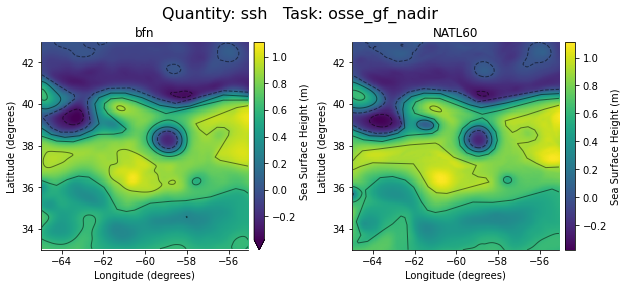

In [6]:
quantity = 'ssh'
plot_both(quantity).opts(title=f"Quantity: {quantity}   Task: {task}")

:Layout
   .Overlay.I  :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.II :Overlay
      .Image.I    :Image   [lon,lat]   (ref)
      .Contours.I :Contours   [lon,lat]   (ref)
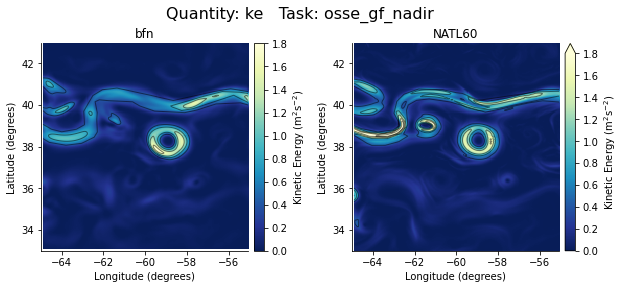

In [7]:
quantity = 'ke'
plot_both(quantity).opts(title=f"Quantity: {quantity}   Task: {task}")

:Layout
   .Overlay.I  :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.II :Overlay
      .Image.I    :Image   [lon,lat]   (ref)
      .Contours.I :Contours   [lon,lat]   (ref)
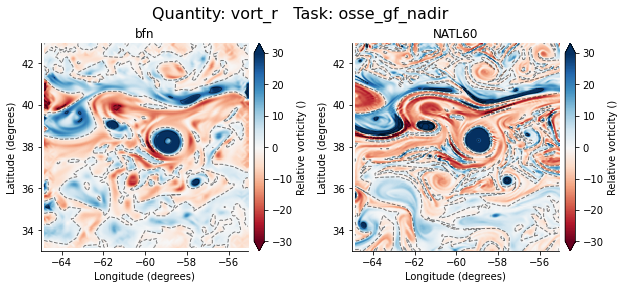

In [8]:
quantity = 'vort_r'
plot_both(quantity).opts(title=f"Quantity: {quantity}   Task: {task}")

:Layout
   .Overlay.I  :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.II :Overlay
      .Image.I    :Image   [lon,lat]   (ref)
      .Contours.I :Contours   [lon,lat]   (ref)
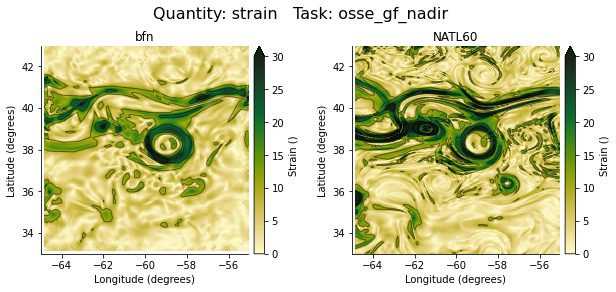

In [9]:
quantity = 'strain'
plot_both(quantity).opts(title=f"Quantity: {quantity}   Task: {task}")

In [10]:
list(lb_cfg.results.outputs.plots.maps.methods)

['duacs',
 'bfn',
 'miost',
 'dymost',
 'nerf_ffn',
 'nerf_siren',
 'nerf_mlp',
 '4dvarnet']

## Plotting maps across methods

In [11]:
quantity = 'vort_r'
plots=[]
for method in list(lb_cfg.results.outputs.plots.maps.methods):
    print(method)    
    lb_cfg = get_cfg(f'task/{task}/leaderboard', v=False)
    lb_cfg.method = method
    lb = hydra.utils.call(lb_cfg.outputs)
    plot_ds = lb.plots.build_ds.maps()
    plots.append(lb.plots.maps[f'{quantity}_study'](plot_ds).opts(title=method))


duacs
bfn
miost
dymost
nerf_ffn
nerf_siren
nerf_mlp
4dvarnet


:Layout
   .Overlay.I    :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.II   :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.III  :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.IV   :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.V    :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.VI   :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.VII  :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.VIII :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
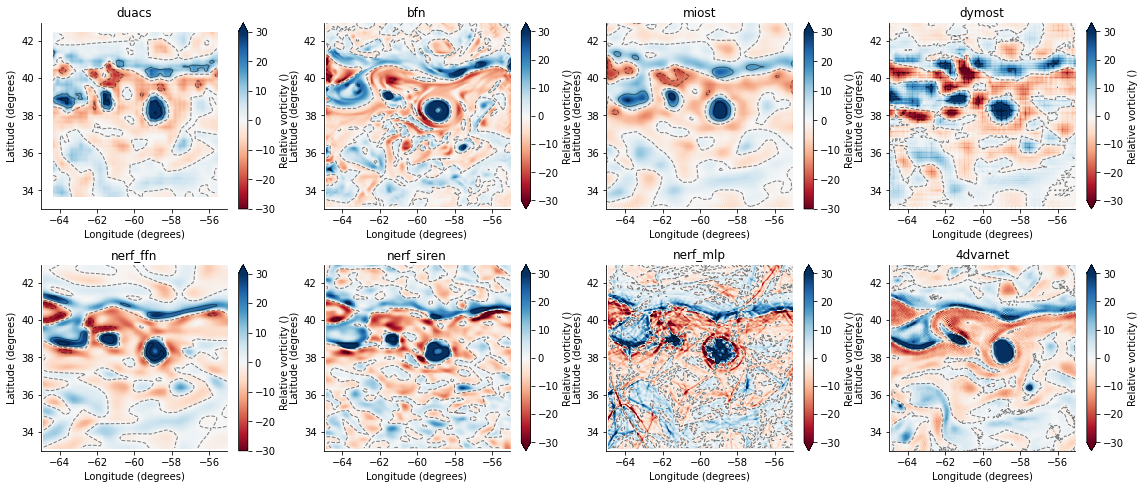

In [12]:
import functools
import operator
functools.reduce(operator.add, plots).opts(sublabel_format='')

In [13]:

    
def trim(plots, ncols=4):
    nrows = len(plots)/ncols
    trimed_plots = []
    for i, p in enumerate(plots):
        img, contour = dict(p.items()).values()
        
        img = img.opts(
            colorbar=(i%ncols) == (ncols-1),
            xticks= None if (i >= ( len(plots) - ncols)) else False,
            xlabel= None if  (i >= ( len(plots) - ncols)) else '',
            ylabel= None if  (i%ncols) ==0 else '',
            yticks= None if  (i%ncols) ==0 else False,
        )    
        trimed_plots.append((img * contour).opts(**p.opts.get().kwargs))
    return functools.reduce(operator.add, trimed_plots).opts(sublabel_format='').opts(vspace=0.1, hspace=0.1)


:Layout
   .Overlay.I    :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.II   :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.III  :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.IV   :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.V    :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.VI   :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.VII  :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.VIII :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
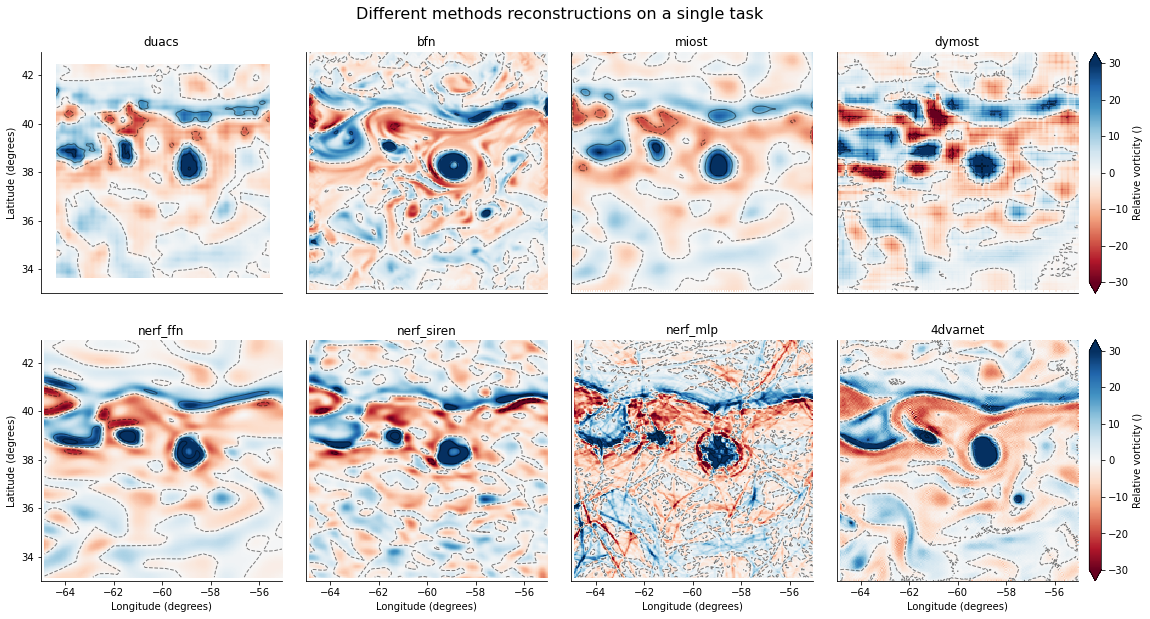

In [14]:
trim(plots, ncols=4).opts(title="Different methods reconstructions on a single task")

## Plotting maps across tasks

In [15]:


quantity = 'vort_r'
method = '4dvarnet'
plots=[]
for task in [
    'osse_gf_nadir',
    'osse_gf_nadirswot',
    'osse_gf_nadir_sst',
    'ose_gf'
]:
    print(task)    
    lb_cfg = get_cfg(f'task/{task}/leaderboard', v=False)
    lb_cfg.method = method
    lb = hydra.utils.call(lb_cfg.outputs)
    plot_ds = lb.plots.build_ds.maps()
    plots.append(lb.plots.maps[f'{quantity}_study'](plot_ds).opts(title=task))



osse_gf_nadir
osse_gf_nadirswot
osse_gf_nadir_sst
ose_gf


:Layout
   .Overlay.I   :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.II  :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.III :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
   .Overlay.IV  :Overlay
      .Image.I    :Image   [lon,lat]   (study)
      .Contours.I :Contours   [lon,lat]   (study)
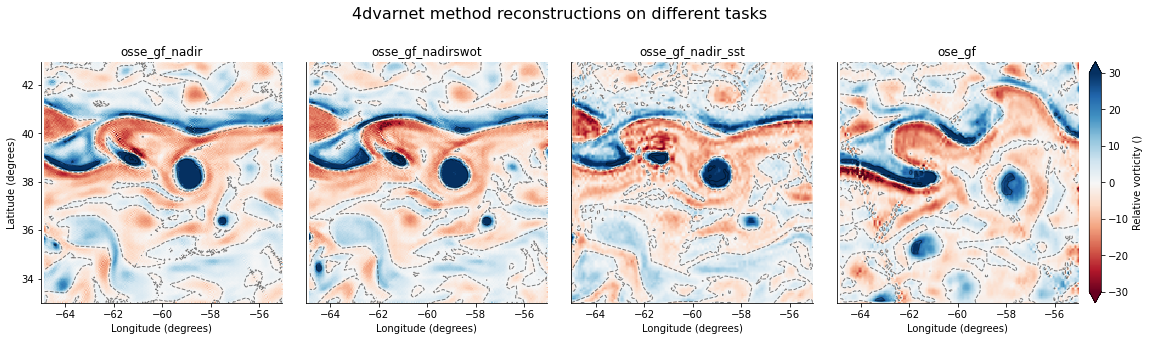

In [16]:
trim(plots, ncols=4).opts(title="4dvarnet method reconstructions on different tasks")